## Importing Libraries

In [ ]:
import time
import datetime
import numpy as np
import pandas as pd

## Reading the data

In [ ]:
sales_data=pd.read_csv("sales.csv")

In [ ]:
#Checking the overview of the data
display(sales_data.head())

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [ ]:
sales_data=pd.read_csv("sales.csv")

In [ ]:
#Checking the shape of the data
display(sales_data.shape)

(723094, 13)

In [ ]:
#Checking the datatypes of different columns of the data
sales_data.dtypes

,0
product_id,object
store_id,object
date,object
sales,float64
revenue,float64
stock,float64
price,float64
promo_type_1,object
promo_bin_1,object
promo_type_2,object


In [ ]:
#Checking the count of null values in each column
sales_data.isnull().sum()

,0
product_id,0
store_id,0
date,0
sales,0
revenue,0
stock,0
price,10439
promo_type_1,1
promo_bin_1,645154
promo_type_2,1


In [ ]:
# Creating column's subsets as per the datatype

sales_dtypes = sales_data.dtypes.reset_index()
sales_dtypes.columns = ['variable', 'dtype']

# Getting the categorical columns
cat_cols = sales_dtypes[sales_dtypes['dtype']=='object']['variable'].tolist()

# Getting the continuos columns
cont_cols = sales_dtypes[sales_dtypes['dtype']!='object']['variable'].tolist()

print("Categorical Columns:", cat_cols)
print()
print("Continuos Columns:", cont_cols)

Categorical Columns: ['product_id', 'store_id', 'date', 'promo_type_1', 'promo_bin_1', 'promo_type_2']

Continuos Columns: ['sales', 'revenue', 'stock', 'price', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2']


In [ ]:
# Descriptive statistics include those that summarize the count, unique and top category freq of a dataset’s distribution.
display(sales_data[cat_cols].describe().T)

,count,unique,top,freq
product_id,723094,331,P0333,6205
store_id,723094,117,S0038,13770
date,723094,55,2017-02-24,13486
promo_type_1,723093,12,PR14,645153
promo_bin_1,77940,5,verylow,29136
promo_type_2,723093,1,PR03,723093


In [ ]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.
display(sales_data[cont_cols].describe(percentiles=[.05,.25,.50,.75,.95]).round(2).T)

,count,mean,std,min,5%,25%,50%,75%,95%,max
sales,723094.0,0.64,39.97,0.00,0.00,0.0,0.00,0.00,3.0,27656.00
revenue,723094.0,2.07,87.82,0.00,0.00,0.0,0.00,0.00,8.8,52496.85
stock,723094.0,16.29,40.39,0.00,1.00,4.0,9.00,17.00,49.0,2892.00
price,712655.0,9.16,11.22,0.25,0.75,2.5,5.75,11.45,29.9,249.90
promo_bin_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_discount_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_discount_type_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Function to get categorical column volumetric analysis

def get_volumetric(sales_data, col):


    col_volumetric = sales_data[col].value_counts(dropna=False).reset_index()
    col_volumetric.columns = [col, 'volume']
    col_volumetric['%volume'] = ((col_volumetric['volume']*100)/col_volumetric['volume'].sum()).round(2)

    return col_volumetric

In [ ]:
# Getting the category volume distribution and cardinality
for col in cat_cols:
    cat_volumteric_t = get_volumetric(sales_data, col)
    print(col)
    print(f"Unique Category preset: {cat_volumteric_t.shape[0]}")
    display(cat_volumteric_t)
    print()

product_id
Unique Category preset: 331


,product_id,volume,%volume
0,P0333,6205,0.86
1,P0438,6188,0.86
2,P0051,6108,0.84
3,P0364,6087,0.84
4,P0569,6067,0.84
...,...,...,...
326,P0386,6,0.00
327,P0698,2,0.00
328,P0475,1,0.00
329,P0289,1,0.00



store_id
Unique Category preset: 117


,store_id,volume,%volume
0,S0038,13770,1.90
1,S0085,13182,1.82
2,S0115,12447,1.72
3,S0097,11992,1.66
4,S0094,11985,1.66
...,...,...,...
112,S0128,709,0.10
113,S0098,670,0.09
114,S0081,637,0.09
115,S0029,633,0.09



date
Unique Category preset: 55


,date,volume,%volume
0,2017-02-24,13486,1.87
1,2017-02-23,13467,1.86
2,2017-02-22,13439,1.86
3,2017-02-21,13400,1.85
4,2017-02-17,13384,1.85
5,2017-02-20,13374,1.85
6,2017-02-19,13371,1.85
7,2017-02-10,13344,1.85
8,2017-01-20,13344,1.85
9,2017-02-18,13341,1.84



promo_type_1
Unique Category preset: 13


,promo_type_1,volume,%volume
0,PR14,645153,89.22
1,PR05,24879,3.44
2,PR10,22155,3.06
3,PR12,10365,1.43
4,PR03,6292,0.87
5,PR09,5099,0.71
6,PR07,3897,0.54
7,PR06,3288,0.45
8,PR08,1257,0.17
9,PR17,487,0.07



promo_bin_1
Unique Category preset: 6


,promo_bin_1,volume,%volume
0,NaN,645154,89.22
1,verylow,29136,4.03
2,low,15725,2.17
3,moderate,13361,1.85
4,high,11352,1.57
5,veryhigh,8366,1.16



promo_type_2
Unique Category preset: 2


,promo_type_2,volume,%volume
0,PR03,723093,100.0
1,NaN,1,0.0


/tmp/ipython-input-1479567348.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cat_volumteric_t, x='volume', y='promo_type_2', inner='stick', palette='Dark2')


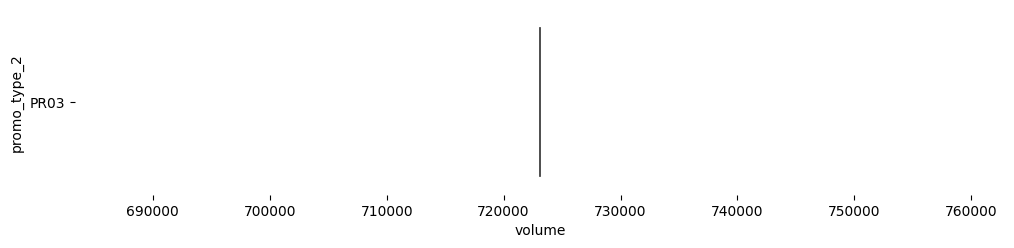

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cat_volumteric_t['promo_type_2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cat_volumteric_t, x='volume', y='promo_type_2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

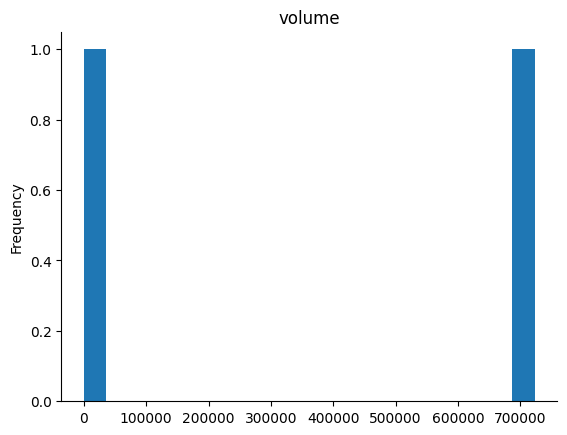

In [ ]:
from matplotlib import pyplot as plt
cat_volumteric_t['volume'].plot(kind='hist', bins=20, title='volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Removing the columns with imbalanced distribution of data
# I will add error handling here in case these columns don't exist after loading the data
try:
    sales_data = sales_data.drop(['promo_bin_1','promo_bin_2','promo_discount_2','promo_discount_type_2','promo_type_1','promo_type_2'], axis=1)
except KeyError as e:
    print(f"Warning: Some columns to drop were not found in the dataframe: {e}")

In [ ]:
# Extracting month, week, day name and year from the date column
# Drop rows with missing dates before extracting date components
sales_data.dropna(subset=['date'], inplace=True)

sales_data['month']=pd.to_datetime(sales_data['date']).dt.month
sales_data['week']=pd.to_datetime(sales_data['date']).dt.isocalendar().week.astype(int) # Use isocalendar().week and convert to int
sales_data['day_name']=pd.to_datetime(sales_data['date']).dt.day_name()
sales_data['year']=pd.to_datetime(sales_data['date']).dt.year
display(sales_data.head())

,product_id,store_id,date,sales,revenue,stock,price,month,week,day_name,year
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,1,1,Monday,2017
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,1,1,Monday,2017
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,1,1,Monday,2017
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,1,1,Monday,2017
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,1,1,Monday,2017


from matplotlib import pyplot as plt
_df_0['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['stock'].plot(kind='hist', bins=20, title='stock')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('store_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sales', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='revenue', y='stock', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['stock']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('stock')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['stock'].plot(kind='line', figsize=(8, 4), title='stock')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['store_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sales', y='store_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['store_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='revenue', y='store_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['store_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='stock', y='store_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

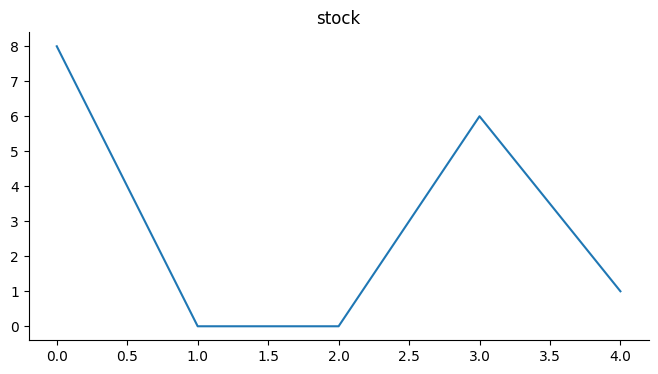

In [ ]:
from matplotlib import pyplot as plt
_df_12['stock'].plot(kind='line', figsize=(8, 4), title='stock')
plt.gca().spines[['top', 'right']].set_visible(False)

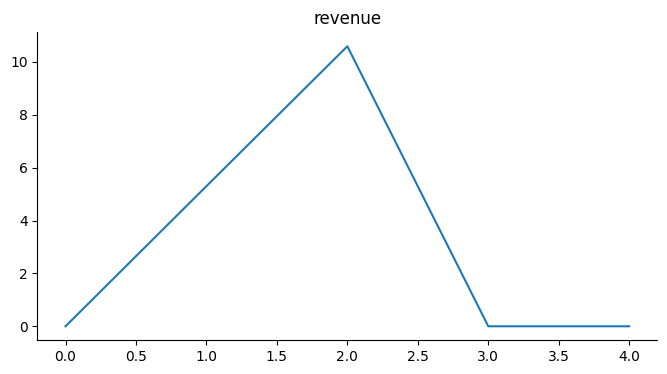

In [ ]:
from matplotlib import pyplot as plt
_df_11['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

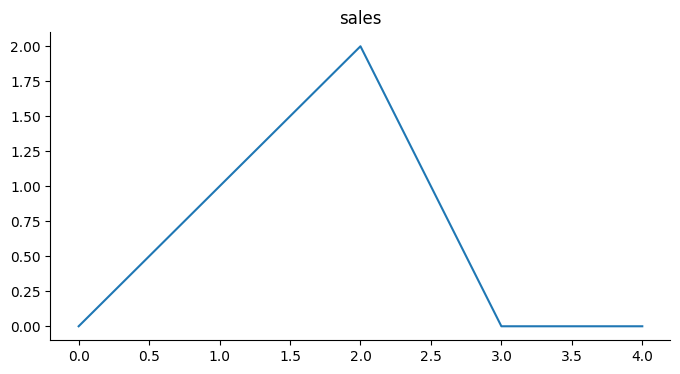

In [ ]:
from matplotlib import pyplot as plt
_df_10['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

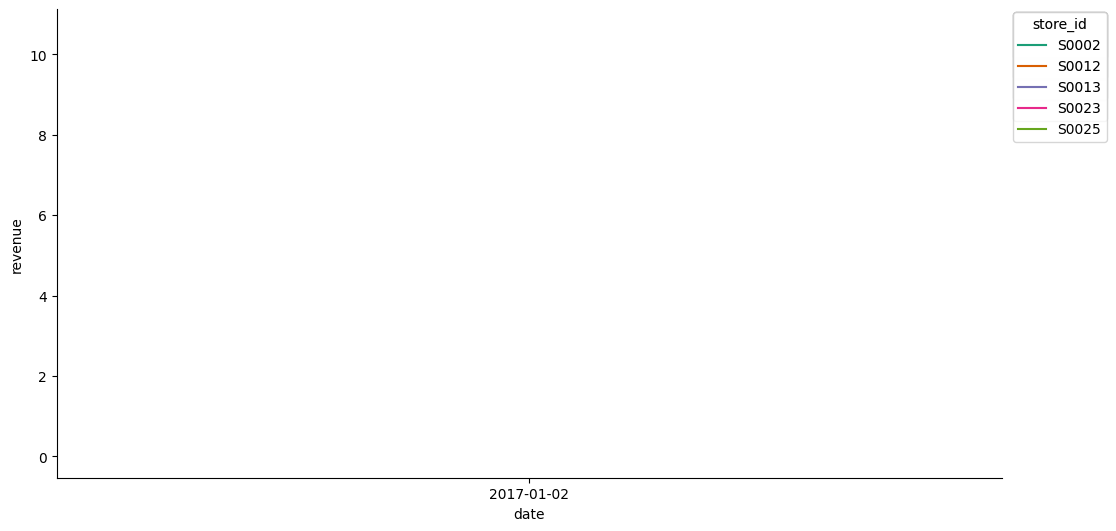

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['revenue']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('revenue')

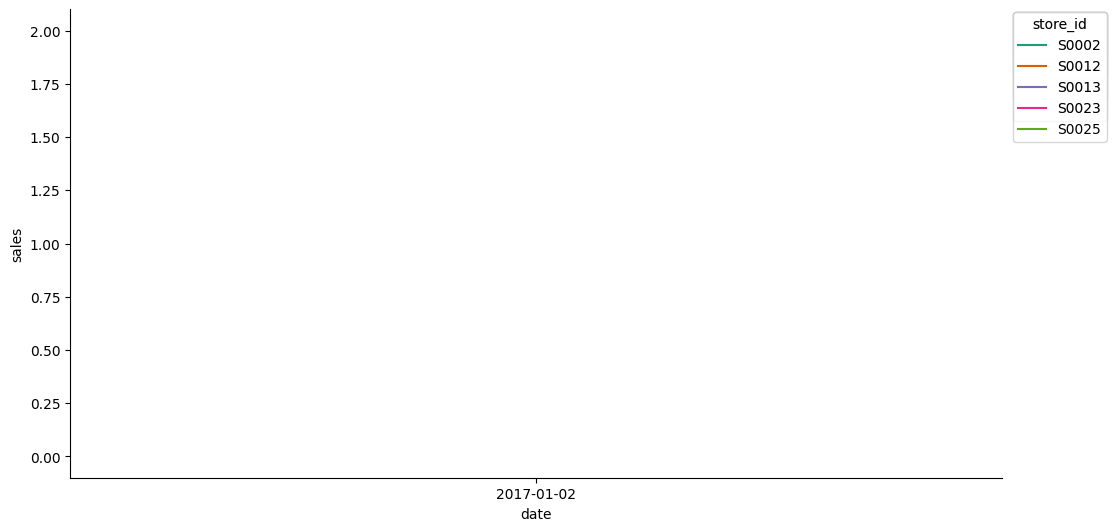

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('store_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='store_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

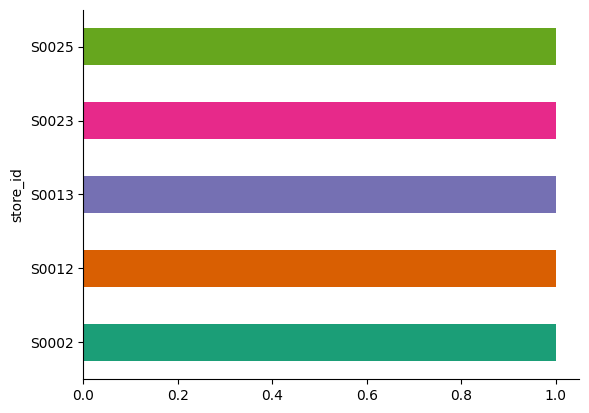

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('store_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)